In [73]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Set notebook display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [119]:
# Load the preprocessed data
data_path = "/home/rer/code/3red/data/features/features_with_target.csv"  # Path to the preprocessed CSV
df = pd.read_csv(data_path)

# Display the first few rows to understand the structure
df.head()

,timestamp,microseconds_since_open,id,quantity,price,side,action,crosses_spread,bp0,bp1,bp2,bp3,bp4,bq0,bq1,bq2,bq3,bq4,ap0,ap1,ap2,ap3,ap4,aq0,aq1,aq2,aq3,aq4,vwap_change,sided_quantity,midprice,vwap,spread,relative_spread,depth,bid_depth,ask_depth,top_imbalance,imbalance,bid_improved,ask_improved,bid_widened,ask_widened,normalized_time,time_sin,time_cos,feat_diff_vwap,feat_diff_relative_spread,feat_diff_imbalance,feat_diff_top_imbalance,feat_diff_depth,feat_diff_vwap_rolling_mean_1,feat_diff_vwap_rolling_mean_60,feat_diff_vwap_rolling_mean_60_minus_1,feat_relative_spread_rolling_mean_1,feat_relative_spread_rolling_mean_60,feat_relative_spread_rolling_mean_60_minus_1,feat_imbalance_rolling_mean_1,feat_imbalance_rolling_mean_60,feat_imbalance_rolling_mean_60_minus_1,feat_top_imbalance_rolling_mean_1,feat_top_imbalance_rolling_mean_60,feat_top_imbalance_rolling_mean_60_minus_1,feat_depth_rolling_mean_1,feat_depth_rolling_mean_60,feat_depth_rolling_mean_60_minus_1,feat_crosses_spread_rolling_sum_1,feat_crosses_spread_rolling_sum_60,feat_crosses_spread_rolling_sum_60_minus_1,feat_ask_improved_rolling_sum_1,feat_ask_improved_rolling_sum_60,feat_ask_improved_rolling_sum_60_minus_1,feat_bid_improved_rolling_sum_1,feat_bid_improved_rolling_sum_60,feat_bid_improved_rolling_sum_60_minus_1,feat_ask_widened_rolling_sum_1,feat_ask_widened_rolling_sum_60,feat_ask_widened_rolling_sum_60_minus_1,feat_bid_widened_rolling_sum_1,feat_bid_widened_rolling_sum_60,feat_bid_widened_rolling_sum_60_minus_1
0,2019-06-10 00:00:00.000000,0,1,16,9990.0,b,a,False,9990.0,0.0,0.0,0.0,0.0,27,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,-72.628853,16,4995.0,9990.000000,-9990.0,-2.0000,27,27,0,27,1.000000,False,False,False,False,0.0,0.0,1.0,0.000000,0.0000,0.000000,16.0,16.0,0.000000,0.000000,0.000000,-2.0000,-2.000000,0.000000,1.000000,1.000000,0.000000,27.0,19.000000,-8.000000,27.0,19.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-10 00:00:00.000000,0,2,1,9995.0,a,a,False,9990.0,0.0,0.0,0.0,0.0,27,0,0,0,0,9995.0,0.0,0.0,0.0,0.0,1,0,0,0,0,-72.628853,-1,9992.5,9992.121212,5.0,0.0005,28,27,1,26,0.928571,False,False,False,True,0.0,0.0,1.0,2.121212,2.0005,-0.071429,-1.0,1.0,2.121212,1.060606,-1.060606,0.0005,-1.333167,-1.333667,0.928571,0.976190,0.047619,26.0,21.333333,-4.666667,28.0,22.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2019-06-10 00:00:00.000000,0,3,6,9990.0,b,a,False,9990.0,0.0,0.0,0.0,0.0,33,0,0,0,0,9995.0,0.0,0.0,0.0,0.0,1,0,0,0,0,-72.628853,6,9992.5,9991.400000,5.0,0.0005,34,33,1,32,0.941176,False,False,False,False,0.0,0.0,1.0,-0.721212,0.0000,0.012605,6.0,6.0,-0.721212,0.466667,1.187879,0.0005,-0.999750,-1.000250,0.941176,0.967437,0.026261,32.0,24.000000,-8.000000,34.0,25.0,-9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,2019-06-10 00:00:00.000000,0,4,1,9990.0,b,a,False,9990.0,0.0,0.0,0.0,0.0,34,0,0,0,0,9995.0,0.0,0.0,0.0,0.0,1,0,0,0,0,-72.628853,1,9992.5,9991.037037,5.0,0.0005,35,34,1,33,0.942857,False,False,False,False,0.0,0.0,1.0,-0.362963,0.0000,0.001681,1.0,1.0,-0.362963,0.259259,0.622222,0.0005,-0.799700,-0.800200,0.942857,0.962521,0.019664,33.0,25.800000,-7.200000,35.0,27.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,2019-06-10 00:00:00.000000,0,5,1,9985.0,b,a,False,9990.0,9985.0,0.0,0.0,0.0,34,1,0,0,0,9995.0,0.0,0.0,0.0,0.0,1,0,0,0,0,-72.628853,1,9992.5,9989.794118,5.0,0.0005,36,35,1,33,0.944444,False,False,False,False,0.0,0.0,1.0,-1.242919,0.0000,0.001587,0.0,1.0,-1.242919,-0.041176,1.201743,0.0005,-0.666333,-0.666833,0.944444,0.959508,0.015064,33.0,27.000000,-6.000000,36.0,28.5,-7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


<Axes: ylabel='Frequency'>

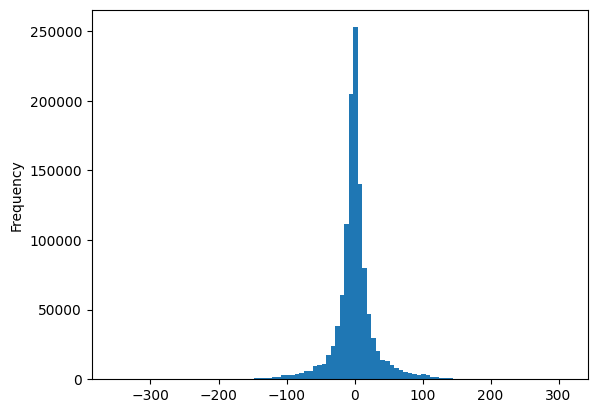

In [121]:
df["vwap_change"].plot(kind="hist", bins=100)

In [129]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define feature columns
numerical_features = [col for col in df if col[:5] == "feat_"] + ["sided_quantity"]
categorical_features = ["action"]
boolean_features = ["crosses_spread"]
other_features = ["time_sin", "time_cos"]

target_column = "vwap_change"  # Target: VWAP change

# Separate features and target
X = df[numerical_features + categorical_features + boolean_features + other_features]
y = df[target_column]

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),  # Scale numerical features
        ("cat", OneHotEncoder(), categorical_features),  # One-hot encode categorical features
    ],
    remainder="passthrough",
)

# Fit and transform the feature matrix
X_preprocessed = preprocessor.fit_transform(X)

# Get the feature names after preprocessing
num_feature_names = numerical_features
cat_feature_names = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features)
bool_feature_names = boolean_features
feature_names = list(num_feature_names) + other_features + list(cat_feature_names) + boolean_features

# Convert the preprocessed features to a DataFrame for visualization
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

# Display the preprocessed features
X_preprocessed_df.head()


,feat_diff_vwap,feat_diff_relative_spread,feat_diff_imbalance,feat_diff_top_imbalance,feat_diff_depth,feat_diff_vwap_rolling_mean_1,feat_diff_vwap_rolling_mean_60,feat_diff_vwap_rolling_mean_60_minus_1,feat_relative_spread_rolling_mean_1,feat_relative_spread_rolling_mean_60,feat_relative_spread_rolling_mean_60_minus_1,feat_imbalance_rolling_mean_1,feat_imbalance_rolling_mean_60,feat_imbalance_rolling_mean_60_minus_1,feat_top_imbalance_rolling_mean_1,feat_top_imbalance_rolling_mean_60,feat_top_imbalance_rolling_mean_60_minus_1,feat_depth_rolling_mean_1,feat_depth_rolling_mean_60,feat_depth_rolling_mean_60_minus_1,feat_crosses_spread_rolling_sum_1,feat_crosses_spread_rolling_sum_60,feat_crosses_spread_rolling_sum_60_minus_1,feat_ask_improved_rolling_sum_1,feat_ask_improved_rolling_sum_60,feat_ask_improved_rolling_sum_60_minus_1,feat_bid_improved_rolling_sum_1,feat_bid_improved_rolling_sum_60,feat_bid_improved_rolling_sum_60_minus_1,feat_ask_widened_rolling_sum_1,feat_ask_widened_rolling_sum_60,feat_ask_widened_rolling_sum_60_minus_1,feat_bid_widened_rolling_sum_1,feat_bid_widened_rolling_sum_60,feat_bid_widened_rolling_sum_60_minus_1,sided_quantity,time_sin,time_cos,action_a,action_d,action_m,crosses_spread
0,0.004132,0.001233,-0.000026,3.191582,2.316791,0.004132,0.011421,0.001181,-539.078036,-331.931854,-0.005651,2.32789,2.628729,0.000106,1.100423,0.89306,-0.507187,-0.87135,-1.142645,-0.322917,-0.334289,-0.819264,-0.815931,-0.122357,-0.828548,-0.822755,-0.133146,-0.907878,-0.901427,-0.126497,-0.824488,-0.81914,-0.138899,-0.904445,-0.898353,2.851584,1.0,0.0,0.0,False,0.0,1.0
1,106.074746,485.611765,-0.946581,-0.199508,0.144796,106.074746,116.714055,-59.181135,-0.140218,-221.318174,-279.20142,2.156004,2.564031,0.190318,1.056548,1.015003,-0.295662,-0.849767,-1.071785,-0.242251,-0.334289,-0.819264,-0.815931,-0.122357,-0.828548,-0.822755,-0.133146,-0.907878,-0.901427,7.905299,0.048104,-0.81914,-0.138899,-0.904445,-0.898353,-0.221446,1.0,0.0,0.0,False,0.0,1.0
2,-36.059877,0.001233,0.167013,1.196823,0.868794,-36.059877,51.36058,66.285375,-0.140218,-166.011334,-209.402478,2.186337,2.540245,0.105002,1.319797,1.154366,-0.507187,-0.720263,-1.000926,-0.363249,-0.334289,-0.819264,-0.815931,-0.122357,-0.828548,-0.822755,-0.133146,-0.907878,-0.901427,-0.126497,0.048104,0.062487,-0.138899,-0.904445,-0.898353,1.04392,1.0,0.0,0.0,False,0.0,1.0
3,-18.145729,0.001233,0.022245,0.199444,0.144796,-18.145729,28.538731,34.721473,-0.140218,-132.82723,-167.523113,2.190381,2.526887,0.078652,1.363672,1.248436,-0.456421,-0.698679,-0.953687,-0.322917,-0.334289,-0.819264,-0.815931,-0.122357,-0.828548,-0.822755,-0.133146,-0.907878,-0.901427,-0.126497,0.048104,0.062487,-0.138899,-0.904445,-0.898353,0.140087,1.0,0.0,0.0,False,0.0,1.0
4,-62.147702,0.001233,0.021008,-0.000032,0.144796,-62.147702,-4.519388,67.059,-0.140218,-110.704494,-139.603536,2.194201,2.5187,0.060277,1.363672,1.311149,-0.380272,-0.677095,-0.918257,-0.30275,-0.334289,-0.819264,-0.815931,-0.122357,-0.828548,-0.822755,-0.133146,-0.907878,-0.901427,-0.126497,0.048104,0.062487,-0.138899,-0.904445,-0.898353,0.140087,1.0,0.0,0.0,False,0.0,1.0


In [130]:
# Split preprocessed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, shuffle=False, random_state=42)

# Verify the split
print(f"Training size: {X_train.shape}, Test size: {X_test.shape}")


Training size: (943974, 42), Test size: (235994, 42)


In [131]:
# Perform cross-validated Lasso regression to find the best alpha
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=2000)
lasso_cv.fit(X_train, y_train)

# Optimal alpha
optimal_alpha = lasso_cv.alpha_
print(f"Optimal alpha: {optimal_alpha}")

# Train final Lasso model with the optimal alpha
lasso = Lasso(alpha=optimal_alpha)
lasso.fit(X_train, y_train)


Optimal alpha: 0.1077159756744806


Lasso(alpha=np.float64(0.1077159756744806))

In [132]:
# Predict on the test set
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 1342.8122
R² Score: 0.0039


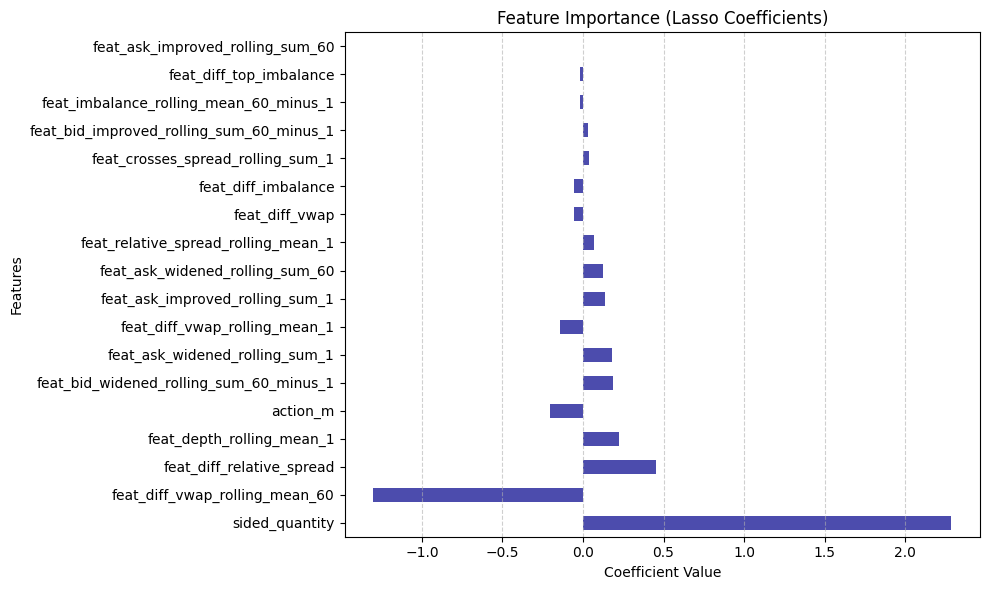

In [133]:
# Extract coefficients
coefficients = pd.Series(lasso.coef_, index=X_preprocessed_df.columns)

# Sort by absolute value
coefficients = coefficients[coefficients != 0].sort_values(key=np.abs, ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
coefficients.plot(kind="barh", color="darkblue", alpha=0.7)
plt.title("Feature Importance (Lasso Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


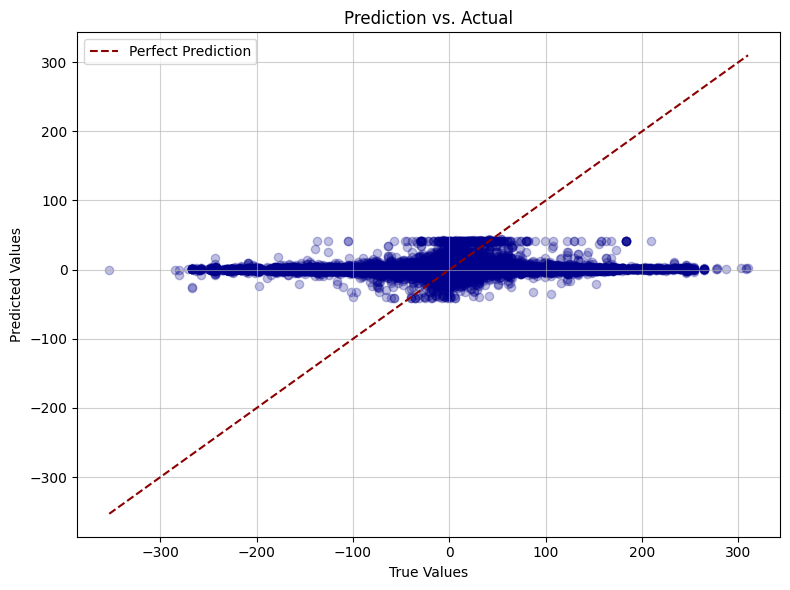

In [134]:
# Plot prediction vs. ground truth
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.25, color="darkblue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="darkred", linestyle="--", label="Perfect Prediction")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs. Actual")
plt.legend()
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()
